In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
%matplotlib inline


In [42]:
df=pd.read_csv('Churn_Modelling.csv')

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df_new=df[['Gender','Geography','Exited']]
df_new.head()

,Gender,Geography,Exited
0,Female,France,1
1,Female,Spain,0
2,Female,France,1
3,Female,France,0
4,Female,Spain,0


# Univariate Analysis

### count plot

<Axes: xlabel='Exited', ylabel='count'>

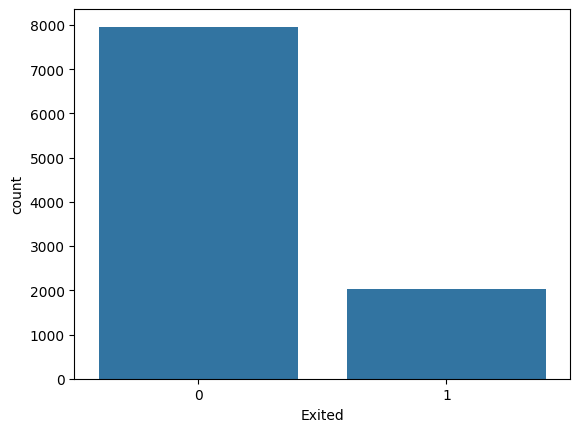

In [45]:
sns.countplot(x='Exited',data=df_new)

# churn Rate calculation

In [46]:
df_new['Exited'].value_counts()/len(df_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

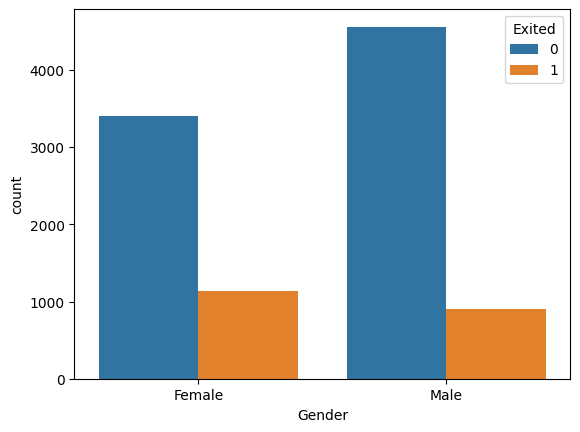

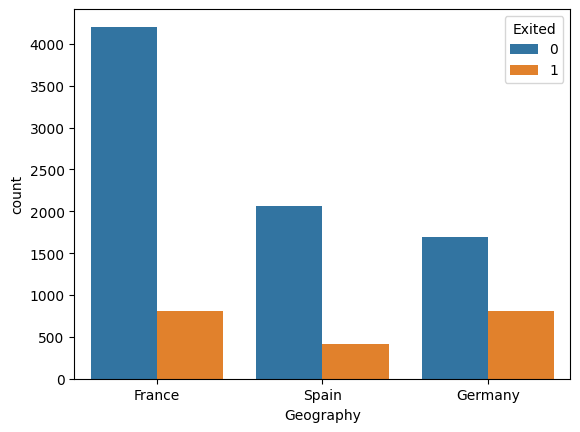

In [47]:
# Count plot for each predictor against 'Exited'
for i ,predictor in enumerate(df_new.drop(columns='Exited')):
    plt.figure()
    sns.countplot(x=predictor,data=df_new,hue='Exited')

# Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

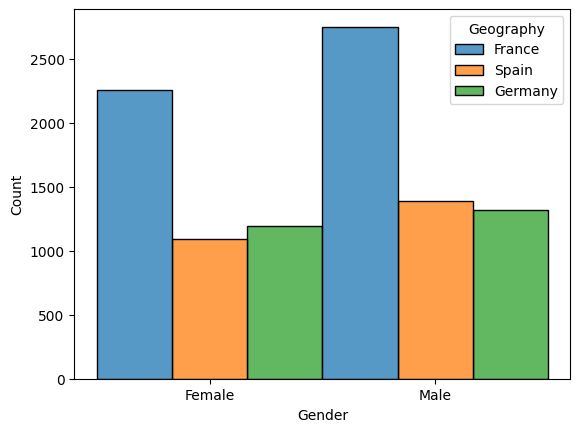

In [48]:
sns.histplot(x='Gender',data=df_new,hue='Geography',multiple='dodge')

<Axes: xlabel='Gender', ylabel='Count'>

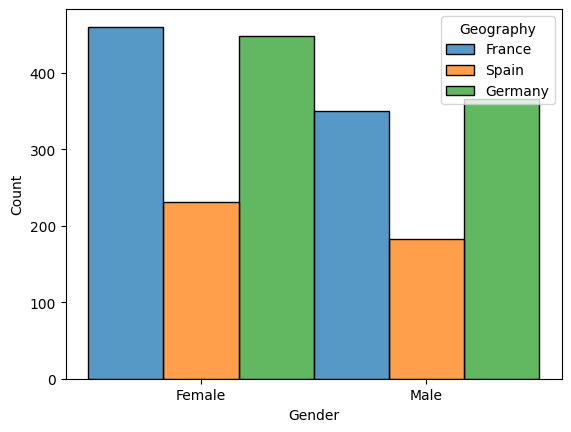

In [49]:
df_new2=df_new.loc[df_new['Exited']==1 ]
sns.histplot(x='Gender',data=df_new2,hue='Geography',multiple='dodge')

In [50]:
df_new2.head()

,Gender,Geography,Exited
0,Female,France,1
2,Female,France,1
5,Male,Spain,1
7,Female,Germany,1
16,Male,Germany,1


# Numerical Analysis

- +1 = positive correlation
- -1 = negative correlation
- ~0 = no correlation

In [51]:
df.select_dtypes(include='number').corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

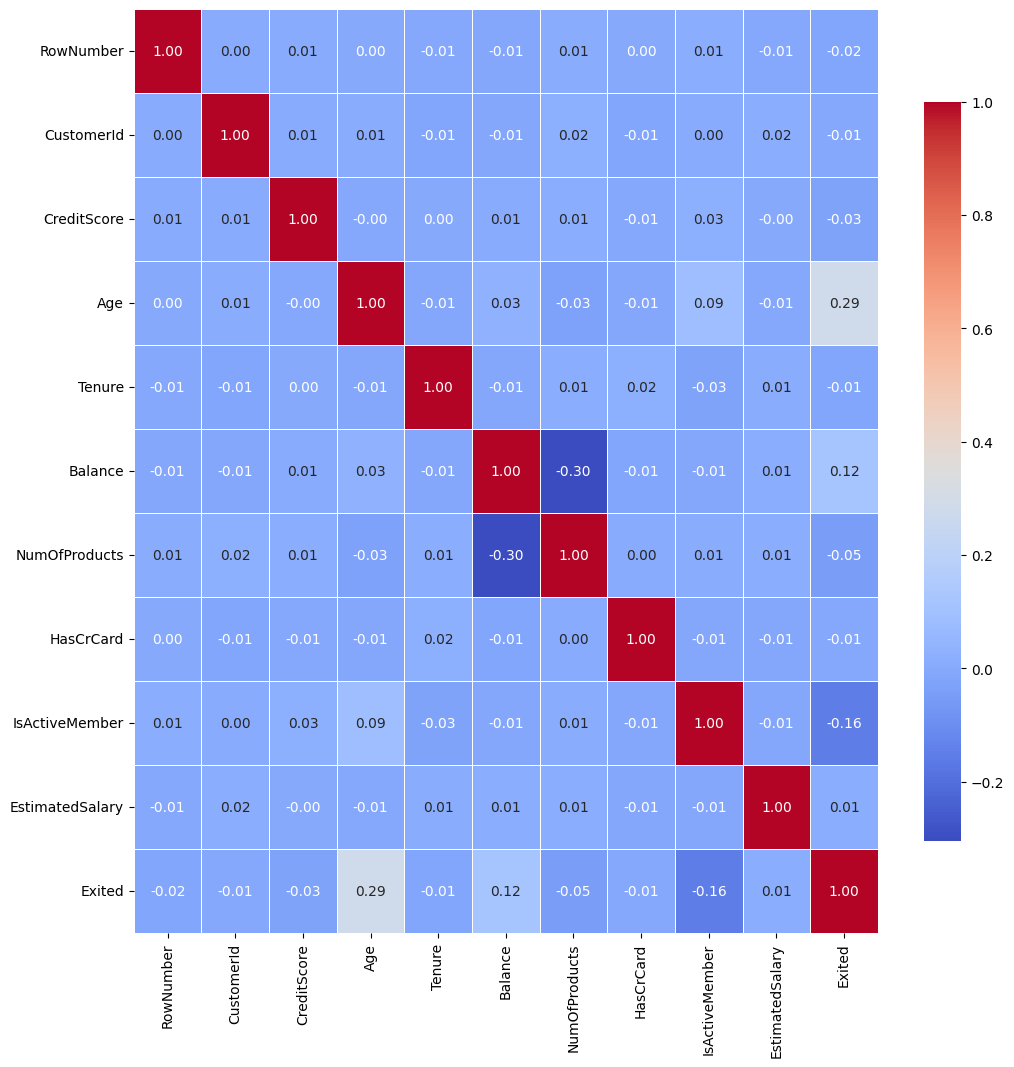

In [52]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

<Axes: >

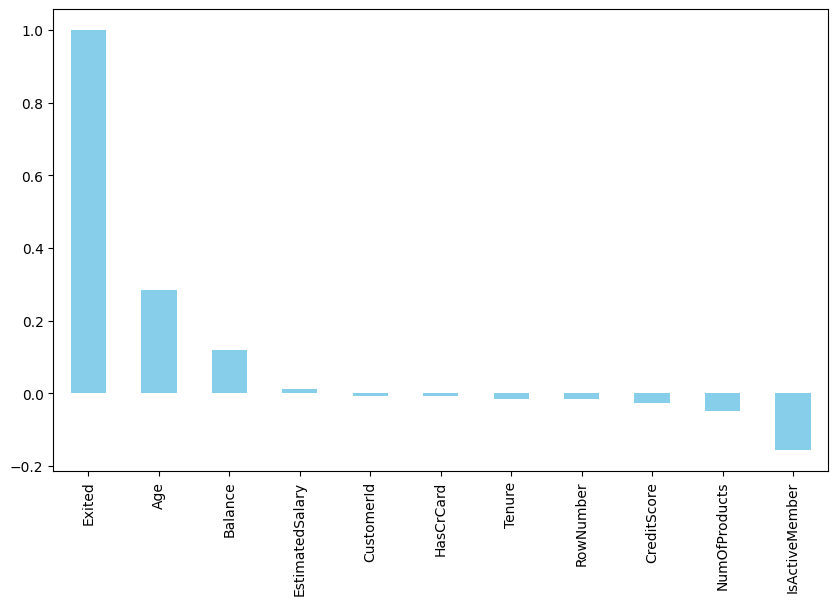

In [53]:
df.select_dtypes(include='number').corr()['Exited'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='Age', ylabel='Exited'>

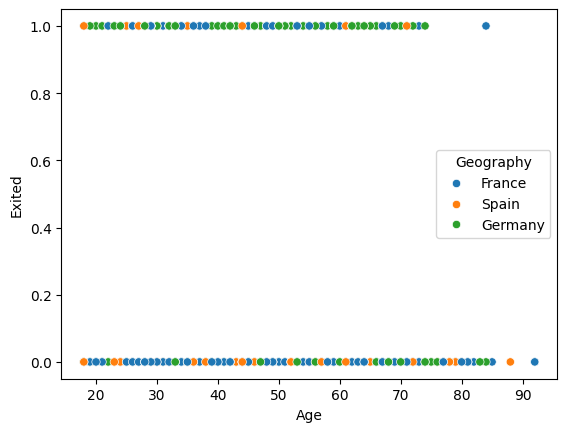

In [54]:
sns.scatterplot(x='Age', y='Exited', data=df, hue='Geography')

<Axes: xlabel='Age'>

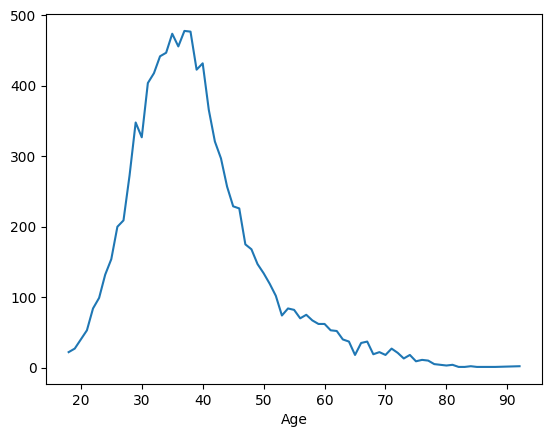

In [55]:
df['Age'].value_counts().sort_index().plot()

In [56]:
df_new3=df.loc[df['Exited']==1]
df_new3.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


<Axes: xlabel='Age'>

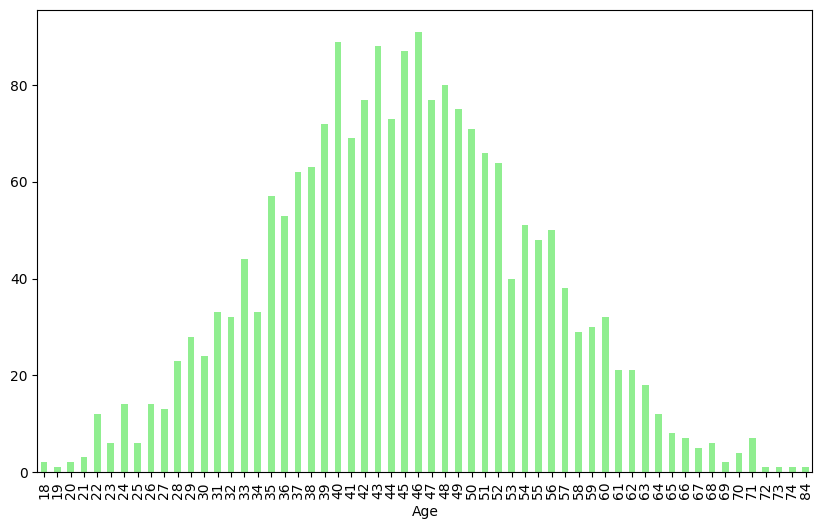

In [57]:
df_new3['Age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='lightgreen')

C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5044\1469691387.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'][df['Exited']==1], color='red', shade=True, label='Churned Customers')
C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5044\1469691387.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'][df['Exited']==0], color='green', shade=True, label='Non-Churned Customers')


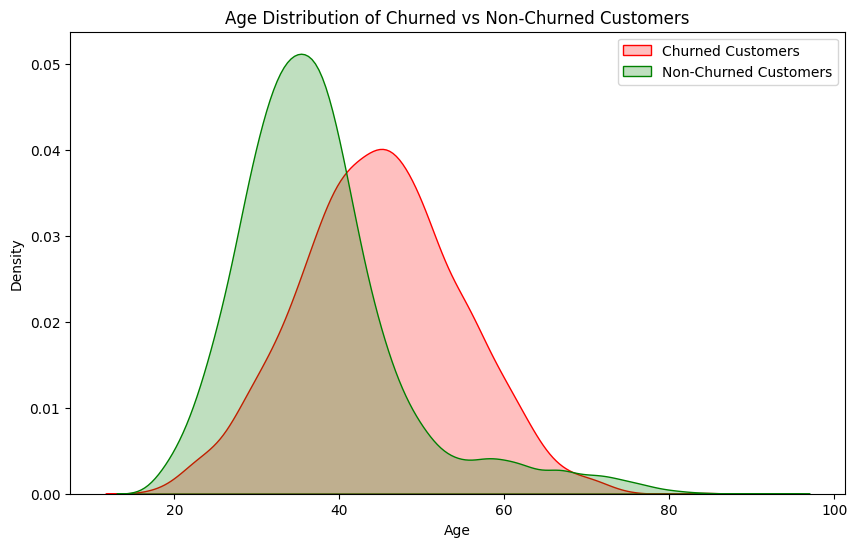

In [58]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Age'][df['Exited']==1], color='red', shade=True, label='Churned Customers')
sns.kdeplot(df['Age'][df['Exited']==0], color='green', shade=True, label='Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Churned vs Non-Churned Customers')
plt.legend(loc='upper right')
plt.show()

C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5044\2771280675.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tenure'][df['Exited']==1], color='red', shade=True, label='Churned Customers')
C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5044\2771280675.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tenure'][df['Exited']==0], color='green', shade=True, label='Non-Churned Customers')


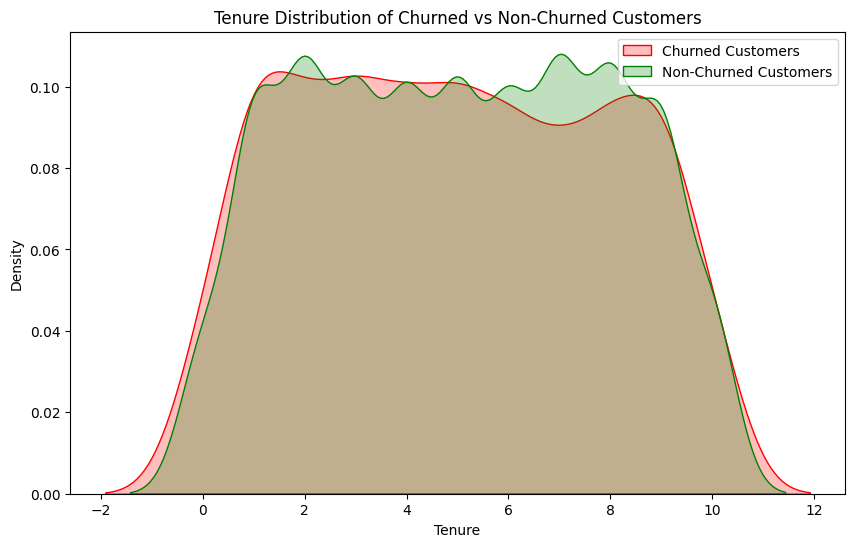

In [59]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Tenure'][df['Exited']==1], color='red', shade=True, label='Churned Customers')
sns.kdeplot(df['Tenure'][df['Exited']==0], color='green', shade=True, label='Non-Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Tenure Distribution of Churned vs Non-Churned Customers')
plt.legend(loc='upper right')
plt.show()

C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5044\3342885093.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Balance'][df['Exited']==1], color='red', shade=True, label='Churned Customers')
C:\Users\skt_pie\AppData\Local\Temp\ipykernel_5044\3342885093.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Balance'][df['Exited']==0], color='green', shade=True, label='Non-Churned Customers')


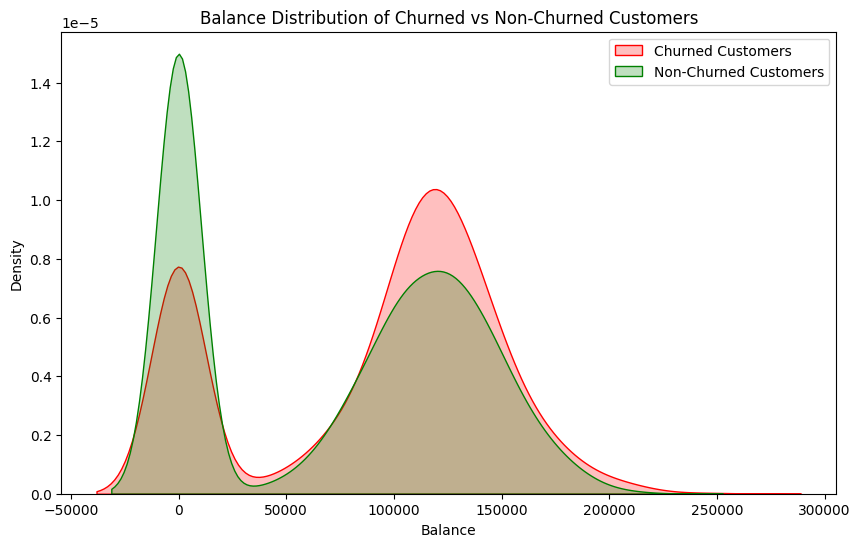

In [60]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Balance'][df['Exited']==1], color='red', shade=True, label='Churned Customers')
sns.kdeplot(df['Balance'][df['Exited']==0], color='green', shade=True, label='Non-Churned Customers')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Balance Distribution of Churned vs Non-Churned Customers')
plt.legend(loc='upper right')
plt.show()